# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to create a simulation and visualize its report

In [91]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [92]:
url = "http://78.47.131.57:8080"

In [93]:
report_url = url + '/report'

# Read Report

In [94]:
querystring = {"runtime_id": "a9670dfa3c7811eab92eacde48001122"}

In [95]:
response = requests.request("GET", report_url, params=querystring)
response # should be <Response [200]>

<Response [200]>

In [96]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

## Data extracted

In [97]:
servers

[X(name='App Server 1', type='APP_SERVER', metrics=X(C0=[[1, 0, 0, 'IN', 'Anomaly 1'], [1.00000001, 300, 0, 'IN', 'Anomaly 1'], [2.00000001, 300, 0, 'OUT', 'Anomaly 1'], [2.00000002, 0, 0, 'OUT', 'Anomaly 1'], [3.0432287027175087, 1, 0, 'IN', 15265], [3.044127598296741, 2, 0, 'IN', 15269], [3.0445695414498735, 3, 0, 'IN', 15271], [3.0446896197839557, 4, 0, 'IN', 15273], [3.0452927175955455, 5, 0, 'IN', 15276], [3.0457657316097264, 6, 0, 'IN', 15278], [3.0460363421033834, 7, 0, 'IN', 15280], [3.0462080373284914, 8, 0, 'IN', 15282], [3.0469579172654644, 9, 0, 'IN', 15284], [3.0472654863293784, 10, 0, 'IN', 15286], [3.047304532114922, 11, 0, 'IN', 15288], [3.047588646493958, 12, 0, 'IN', 15290], [3.047762313530302, 13, 0, 'IN', 15292], [3.0479484534658794, 14, 0, 'IN', 15295], [3.048684644096703, 15, 0, 'IN', 15297], [3.050602585922768, 16, 0, 'IN', 15300], [3.050968420001389, 17, 0, 'IN', 15302], [3.0520701438471805, 18, 0, 'IN', 15304], [3.05231068163156, 19, 0, 'IN', 15306], [3.0529430

In [98]:
servers = report.report
servers[0].name

'App Server 1'

In [99]:
component

[]

In [100]:
df_list = []
for server in servers:
    print(server.name)
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue", "label", "name"])
        df_list.append(df)

App Server 1
DB Server 1


In [101]:
df_list[0]

,step,cpu_usage,queue,label,name
0,1.000000,0,0,IN,Anomaly 1
1,1.000000,300,0,IN,Anomaly 1
2,2.000000,300,0,OUT,Anomaly 1
3,2.000000,0,0,OUT,Anomaly 1
4,3.043229,1,0,IN,15265
...,...,...,...,...,...
4543,8.641167,4,0,OUT,19644
4544,8.948631,3,0,OUT,18199
4545,9.226072,2,0,OUT,18313
4546,9.550508,1,0,OUT,19068


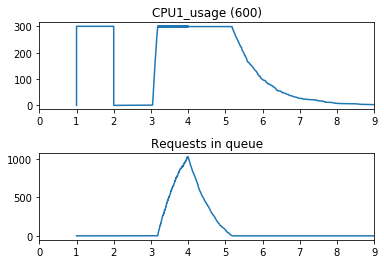

In [102]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (600)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

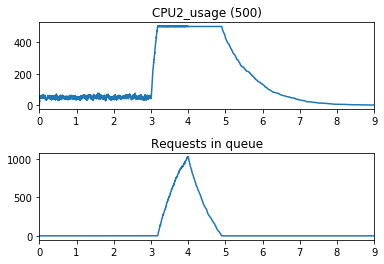

In [103]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (500)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)